# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

## Busqueda por moléculas 'multi-blancos'

### Contexto de trabajo

La enfermedad de Alzheimer (EA) es una enfermedad neurodegenerativa caracterizada por la muerte neuronal y la pérdida de conexiones entre las neuronas del cerebro;

es una de las principales causas de demencia entre los ancianos, afectando a millones de personas en todo el mundo;

debido a que es una enfermedad multifactorial y tiene numerosas blancos terapéuticos, se ha cambiado el estudio de fármacos que actúen sobre un único blanco de la enfermedad y ha dado lugar a la búsqueda de nuevas estrategias que permitan el descubrimiento de fármacos con actividad multifactorial.

En este trabajo utilizamos la base de datos (ChEMBL, https://www.ebi.ac.uk/chembl/) de moléculas bioactivas para crear un perfil 'multi-blanco'.

## Algoritmo

1. Elija el número K de grupos (Método del Elbow);

2. Seleccione _k_ puntos aleatorios, los centroides;

3. Asigne cada punto de datos al centroide más cercano, que forma los grupos;

4. Calcule y coloque el nuevo centroide de cada grupo;

5. Reasignar cada punto de datos al nuevo centroide más cercano.
	
    *Si se produce alguna reasignación, vaya al paso 4, de lo contrario, vaya a la finalización.

<img src="./Figures/K-means.png" width="600" height="600"/>

## Reflexões

**¿Cómo puedo convertir una molécula en n variables?**


**¿Es K-means la estrategia más adecuada para este tipo de problema?**


**Teniendo en cuenta que los datos se pueden etiquetar, ¿puede ser más ventajoso optar por una estrategia de clasificación?**

# Importación del conjunto de datos

Usamos el notebook `Descriptores` para calcular las características del modelo.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

## ACHE

In [58]:
ACHE = pd.read_csv('Dp_ACHE.csv', sep=';')
ACHE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
0,0,0.488124,300.362,5,88.72,5,2,0.0
1,1,0.765195,312.482,5,6.48,3,0,0.0
2,2,0.392838,258.494,11,0.00,0,0,0.0
3,3,0.485768,275.352,5,64.93,4,2,0.0
4,4,0.234841,363.414,8,100.46,7,2,0.0
...,...,...,...,...,...,...,...,...
5143,5143,0.630629,418.880,3,66.48,3,1,1.0
5144,5144,0.586390,439.298,3,66.48,3,1,1.0
5145,5145,0.669862,398.462,3,66.48,3,1,1.0
5146,5146,0.661014,404.853,3,66.48,3,1,1.0


## BACE

In [59]:
BACE = pd.read_csv('Dp_BACE.csv', sep=';')
BACE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
0,0,0.157234,591.750,17,188.95,8,6,0.0
1,1,0.082313,778.114,24,174.96,9,6,0.0
2,2,0.152968,636.900,19,145.86,8,5,0.0
3,3,0.144127,619.804,18,188.95,8,6,0.0
4,4,0.158828,654.871,18,180.00,9,5,0.0
...,...,...,...,...,...,...,...,...
8035,8035,0.424239,487.441,2,93.70,6,1,1.0
8036,8036,0.606267,499.572,5,135.16,8,2,1.0
8037,8037,0.611343,482.585,3,131.09,6,3,1.0
8038,8038,0.706905,429.427,5,111.72,7,2,1.0


## TAU

In [60]:
TAU = pd.read_csv('Dp_TAU.csv', sep=';')
TAU

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
0,0,0.387190,356.381,4,63.45,3,0,0.0
1,1,0.618155,376.197,2,41.13,2,2,0.0
2,2,0.387190,356.381,4,63.45,3,0,0.0
3,3,0.800202,336.391,3,49.85,4,0,0.0
4,4,0.657127,355.441,4,36.44,3,0,0.0
...,...,...,...,...,...,...,...,...
165,165,0.554085,414.870,4,73.06,7,1,1.0
166,166,0.545623,419.289,3,63.83,6,1,1.0
167,167,0.496768,463.740,3,63.83,6,1,1.0
168,168,0.482342,375.580,8,6.25,1,0,1.0


# Eliminando moléculas inactivas

## ACHE

In [61]:
for i in range(len(ACHE)):
    if ACHE['Activity'][i] == 0:
        ACHE=ACHE.drop(i,axis=0)
        
ACHE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
436,436,0.683243,365.473,7,38.77,4,0,NaN
437,437,0.619042,329.352,1,68.23,6,1,NaN
438,438,0.760072,381.472,6,48.00,5,0,NaN
439,439,0.755578,381.472,6,48.00,5,0,NaN
440,440,0.330777,348.534,11,7.76,0,0,NaN
...,...,...,...,...,...,...,...,...
5143,5143,0.630629,418.880,3,66.48,3,1,1.0
5144,5144,0.586390,439.298,3,66.48,3,1,1.0
5145,5145,0.669862,398.462,3,66.48,3,1,1.0
5146,5146,0.661014,404.853,3,66.48,3,1,1.0


In [62]:
ACHE = ACHE.dropna(axis=0)
ACHE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
563,563,0.196465,592.224,11,83.48,5,3,1.0
564,564,0.577970,463.714,9,34.64,5,1,1.0
565,565,0.803704,411.855,5,35.58,3,1,1.0
566,566,0.269223,417.529,11,59.28,3,1,1.0
567,567,0.683535,242.322,0,58.88,2,2,1.0
...,...,...,...,...,...,...,...,...
5143,5143,0.630629,418.880,3,66.48,3,1,1.0
5144,5144,0.586390,439.298,3,66.48,3,1,1.0
5145,5145,0.669862,398.462,3,66.48,3,1,1.0
5146,5146,0.661014,404.853,3,66.48,3,1,1.0


## BACE

In [63]:
for i in range(len(BACE)):
    if BACE['Activity'][i] == 0:
        BACE=BACE.drop(i,axis=0)
        
BACE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
367,367,0.358767,430.533,5,89.60,4,2,NaN
368,368,0.631234,462.532,4,127.57,9,1,NaN
369,369,0.417946,381.483,3,58.01,4,2,NaN
370,370,0.690483,390.572,8,79.00,4,1,NaN
371,371,0.680988,411.455,3,117.58,6,3,NaN
...,...,...,...,...,...,...,...,...
8035,8035,0.424239,487.441,2,93.70,6,1,1.0
8036,8036,0.606267,499.572,5,135.16,8,2,1.0
8037,8037,0.611343,482.585,3,131.09,6,3,1.0
8038,8038,0.706905,429.427,5,111.72,7,2,1.0


In [64]:
BACE = BACE.dropna(axis=0)
BACE

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
747,747,0.294756,533.416,8,135.08,6,3,1.0
748,748,0.283129,536.441,8,131.84,6,3,1.0
749,749,0.309941,516.385,7,131.84,5,3,1.0
750,750,0.308631,512.998,8,135.08,6,3,1.0
751,751,0.779174,429.481,4,120.73,9,1,1.0
...,...,...,...,...,...,...,...,...
8035,8035,0.424239,487.441,2,93.70,6,1,1.0
8036,8036,0.606267,499.572,5,135.16,8,2,1.0
8037,8037,0.611343,482.585,3,131.09,6,3,1.0
8038,8038,0.706905,429.427,5,111.72,7,2,1.0


## TAU

In [65]:
for i in range(len(TAU)):
    if TAU['Activity'][i] == 0:
        TAU=TAU.drop(i,axis=0)
        
TAU

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
16,16,0.567081,366.464,4,23.55,2,0,NaN
17,17,0.258055,444.462,8,72.68,4,0,NaN
18,18,0.589777,384.479,5,32.78,3,0,NaN
19,19,0.553711,380.491,5,23.55,2,0,NaN
20,20,0.663992,341.414,3,36.44,3,0,NaN
...,...,...,...,...,...,...,...,...
165,165,0.554085,414.870,4,73.06,7,1,1.0
166,166,0.545623,419.289,3,63.83,6,1,1.0
167,167,0.496768,463.740,3,63.83,6,1,1.0
168,168,0.482342,375.580,8,6.25,1,0,1.0


In [66]:
TAU = TAU.dropna(axis=0)
TAU

,Unnamed: 0,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Activity
48,48,0.673796,306.365,3,52.57,3,2,1.0
49,49,0.728251,327.359,6,67.27,5,2,1.0
50,50,0.644053,262.312,2,55.12,2,2,1.0
51,51,0.709979,312.344,5,68.37,4,2,1.0
52,52,0.883316,291.354,3,45.23,3,1,1.0
53,53,0.637716,368.452,8,45.59,4,1,1.0
54,54,0.532970,292.294,3,72.24,3,1,1.0
55,55,0.746618,341.386,6,58.48,5,1,1.0
56,56,0.745969,390.224,3,32.67,3,0,1.0
57,57,0.292099,432.521,12,68.54,8,0,1.0


In [67]:
ACHE = ACHE.drop('Unnamed: 0', axis=1)
ACHE = ACHE.drop('Activity', axis=1)
BACE = BACE.drop('Unnamed: 0', axis=1)
BACE = BACE.drop('Activity', axis=1)
TAU = TAU.drop('Unnamed: 0', axis=1)
TAU = TAU.drop('Activity', axis=1)

In [68]:
ACHE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
563,0.196465,592.224,11,83.48,5,3
564,0.577970,463.714,9,34.64,5,1
565,0.803704,411.855,5,35.58,3,1
566,0.269223,417.529,11,59.28,3,1
567,0.683535,242.322,0,58.88,2,2
...,...,...,...,...,...,...
5143,0.630629,418.880,3,66.48,3,1
5144,0.586390,439.298,3,66.48,3,1
5145,0.669862,398.462,3,66.48,3,1
5146,0.661014,404.853,3,66.48,3,1


In [69]:
BACE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
747,0.294756,533.416,8,135.08,6,3
748,0.283129,536.441,8,131.84,6,3
749,0.309941,516.385,7,131.84,5,3
750,0.308631,512.998,8,135.08,6,3
751,0.779174,429.481,4,120.73,9,1
...,...,...,...,...,...,...
8035,0.424239,487.441,2,93.70,6,1
8036,0.606267,499.572,5,135.16,8,2
8037,0.611343,482.585,3,131.09,6,3
8038,0.706905,429.427,5,111.72,7,2


In [70]:
TAU

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
48,0.673796,306.365,3,52.57,3,2
49,0.728251,327.359,6,67.27,5,2
50,0.644053,262.312,2,55.12,2,2
51,0.709979,312.344,5,68.37,4,2
52,0.883316,291.354,3,45.23,3,1
53,0.637716,368.452,8,45.59,4,1
54,0.532970,292.294,3,72.24,3,1
55,0.746618,341.386,6,58.48,5,1
56,0.745969,390.224,3,32.67,3,0
57,0.292099,432.521,12,68.54,8,0


## Estandarizando la base de datos con MinMaxScaler

Primero, hice algo de estandarización con `StandardScaler`, pero los resultados no fueron satisfactorios, así que cambié a este método `MinMaxScaler`

## ACHE

In [71]:
scaler = MinMaxScaler()
scaler.fit(ACHE)
ACHE=scaler.transform(ACHE)

In [72]:
ACHE = pd.DataFrame(ACHE, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
ACHE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
0,0.157990,0.982866,0.578947,0.428999,0.416667,0.428571
1,0.607398,0.686354,0.473684,0.167879,0.416667,0.142857
2,0.873310,0.566700,0.263158,0.172904,0.250000,0.142857
3,0.243697,0.579791,0.578947,0.299615,0.250000,0.142857
4,0.731753,0.175535,0.000000,0.297476,0.166667,0.285714
...,...,...,...,...,...,...
705,0.669430,0.582908,0.157895,0.338109,0.250000,0.142857
706,0.617317,0.630019,0.157895,0.338109,0.250000,0.142857
707,0.715646,0.535798,0.157895,0.338109,0.250000,0.142857
708,0.705223,0.550544,0.157895,0.338109,0.250000,0.142857


In [73]:
ACHE['Color'] = '1' # Estoy marcando un color para cada proteína tal como se usará en el gráfico 3D
ACHE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Color
0,0.157990,0.982866,0.578947,0.428999,0.416667,0.428571,1
1,0.607398,0.686354,0.473684,0.167879,0.416667,0.142857,1
2,0.873310,0.566700,0.263158,0.172904,0.250000,0.142857,1
3,0.243697,0.579791,0.578947,0.299615,0.250000,0.142857,1
4,0.731753,0.175535,0.000000,0.297476,0.166667,0.285714,1
...,...,...,...,...,...,...,...
705,0.669430,0.582908,0.157895,0.338109,0.250000,0.142857,1
706,0.617317,0.630019,0.157895,0.338109,0.250000,0.142857,1
707,0.715646,0.535798,0.157895,0.338109,0.250000,0.142857,1
708,0.705223,0.550544,0.157895,0.338109,0.250000,0.142857,1


# Visualización de resultados

El propósito de hacer el gráfico a continuación es tener una idea de cuáles serían las mejores características para pasar a K-means.

In [74]:
fig = px.scatter_matrix(ACHE.drop(ACHE.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [75]:
X = ACHE.iloc[:, [0, 1]].values
X

array([[0.15799037, 0.98286595],
       [0.60739842, 0.68635413],
       [0.87331021, 0.56669958],
       ...,
       [0.71564579, 0.53579784],
       [0.70522268, 0.55054383],
       [0.65703471, 0.61982298]])

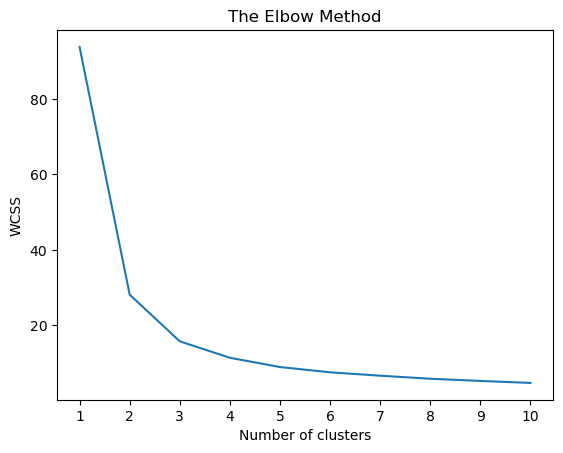

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

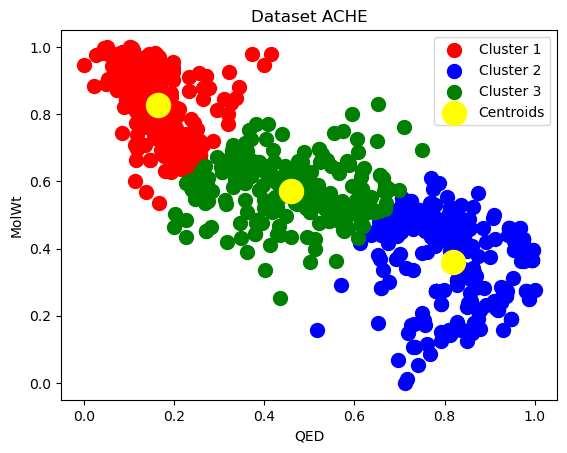

In [78]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset ACHE')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

## BACE

In [79]:
scaler = MinMaxScaler()
scaler.fit(BACE)
BACE=scaler.transform(BACE)

In [80]:
BACE = pd.DataFrame(BACE, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
BACE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
0,0.293506,0.155467,0.137931,0.159240,0.181818,0.130435
1,0.280643,0.157717,0.137931,0.154218,0.181818,0.130435
2,0.310302,0.142800,0.120690,0.154218,0.136364,0.130435
3,0.308854,0.140281,0.137931,0.159240,0.181818,0.130435
4,0.829360,0.078166,0.068966,0.136998,0.318182,0.043478
...,...,...,...,...,...,...
2361,0.436737,0.121273,0.034483,0.095104,0.181818,0.043478
2362,0.638093,0.130295,0.086207,0.159364,0.272727,0.086957
2363,0.643708,0.117661,0.051724,0.153056,0.181818,0.130435
2364,0.749417,0.078125,0.086207,0.123034,0.227273,0.086957


In [81]:
BACE['Color'] = '0'
BACE

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Color
0,0.293506,0.155467,0.137931,0.159240,0.181818,0.130435,0
1,0.280643,0.157717,0.137931,0.154218,0.181818,0.130435,0
2,0.310302,0.142800,0.120690,0.154218,0.136364,0.130435,0
3,0.308854,0.140281,0.137931,0.159240,0.181818,0.130435,0
4,0.829360,0.078166,0.068966,0.136998,0.318182,0.043478,0
...,...,...,...,...,...,...,...
2361,0.436737,0.121273,0.034483,0.095104,0.181818,0.043478,0
2362,0.638093,0.130295,0.086207,0.159364,0.272727,0.086957,0
2363,0.643708,0.117661,0.051724,0.153056,0.181818,0.130435,0
2364,0.749417,0.078125,0.086207,0.123034,0.227273,0.086957,0


In [82]:
fig = px.scatter_matrix(BACE.drop(BACE.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [83]:
X = BACE.iloc[:, [0, 1]].values
X

array([[0.29350555, 0.15546683],
       [0.2806432 , 0.15771667],
       [0.31030245, 0.14280009],
       ...,
       [0.64370808, 0.11766145],
       [0.74941725, 0.07812537],
       [0.75629552, 0.10722892]])

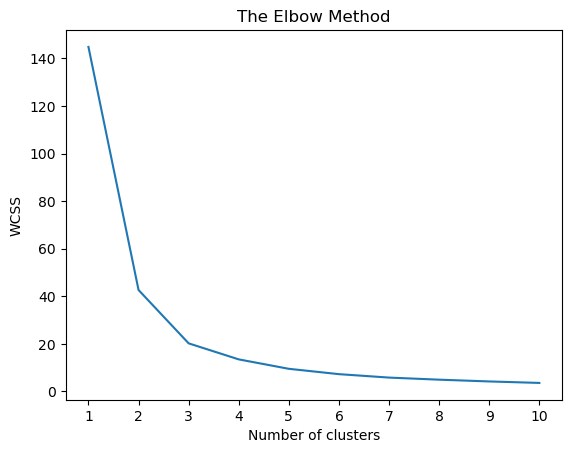

In [84]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [85]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

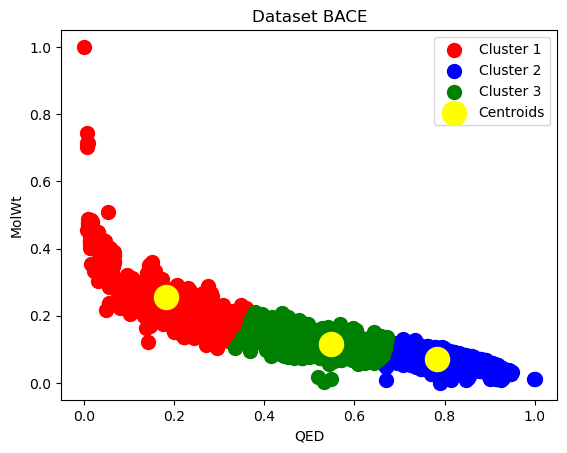

In [86]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset BACE')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

## TAU

In [87]:
scaler = MinMaxScaler()
scaler.fit(TAU)
TAU=scaler.transform(TAU)

In [88]:
TAU = pd.DataFrame(TAU, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
TAU

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors
0,0.645612,0.201756,0.1,0.581179,0.285714,1.0
1,0.737719,0.297905,0.4,0.765621,0.571429,1.0
2,0.595304,0.000000,0.0,0.613174,0.142857,1.0
3,0.706814,0.229139,0.3,0.779423,0.428571,1.0
4,1.000000,0.133008,0.1,0.489084,0.285714,0.5
5,0.584586,0.486105,0.6,0.493601,0.428571,0.5
6,0.407416,0.137313,0.1,0.827980,0.285714,0.5
7,0.768786,0.362147,0.4,0.655332,0.571429,0.5
8,0.767688,0.585817,0.1,0.331493,0.285714,0.0
9,0.000000,0.779531,1.0,0.781556,1.000000,0.0


In [89]:
TAU['Color'] = '2'
TAU

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Color
0,0.645612,0.201756,0.1,0.581179,0.285714,1.0,2
1,0.737719,0.297905,0.4,0.765621,0.571429,1.0,2
2,0.595304,0.000000,0.0,0.613174,0.142857,1.0,2
3,0.706814,0.229139,0.3,0.779423,0.428571,1.0,2
4,1.000000,0.133008,0.1,0.489084,0.285714,0.5,2
5,0.584586,0.486105,0.6,0.493601,0.428571,0.5,2
6,0.407416,0.137313,0.1,0.827980,0.285714,0.5,2
7,0.768786,0.362147,0.4,0.655332,0.571429,0.5,2
8,0.767688,0.585817,0.1,0.331493,0.285714,0.0,2
9,0.000000,0.779531,1.0,0.781556,1.000000,0.0,2


In [90]:
fig = px.scatter_matrix(TAU.drop(TAU.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [91]:
X = TAU.iloc[:, [0, 1]].values
X

array([[0.64561205, 0.20175591],
       [0.7377192 , 0.29790518],
       [0.59530406, 0.        ],
       [0.70681408, 0.22913881],
       [1.        , 0.13300786],
       [0.58458585, 0.48610475],
       [0.40741579, 0.13731291],
       [0.76878632, 0.36214666],
       [0.76768839, 0.58581714],
       [0.        , 0.77953084],
       [0.73363866, 0.29338029],
       [0.65847698, 0.35762178],
       [0.68763272, 0.49029989],
       [0.23538785, 0.66845586],
       [0.3910276 , 1.        ],
       [0.20519968, 0.86246725],
       [0.31467108, 0.87050488],
       [0.59187038, 0.37601444],
       [0.47191956, 0.60970561],
       [0.43126867, 0.88053016],
       [0.71855396, 0.31679246],
       [0.37917211, 0.63445051],
       [0.49135325, 0.54546412],
       [0.54531828, 0.49548427],
       [0.35423611, 0.87259329],
       [0.20449763, 0.73398428],
       [0.32851054, 0.73398428],
       [0.44312998, 0.698692  ],
       [0.42881734, 0.71893033],
       [0.34618316, 0.92250902],
       [0.

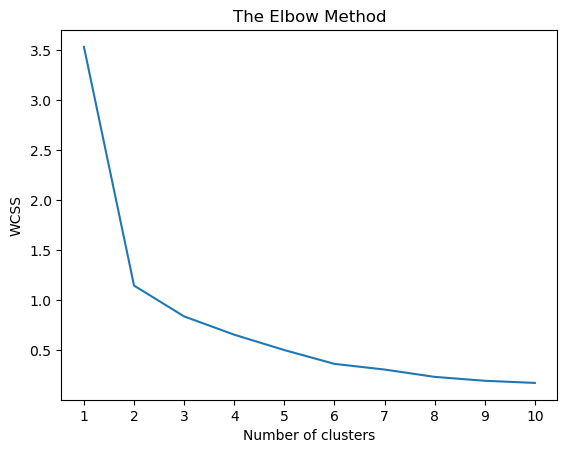

In [92]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [93]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

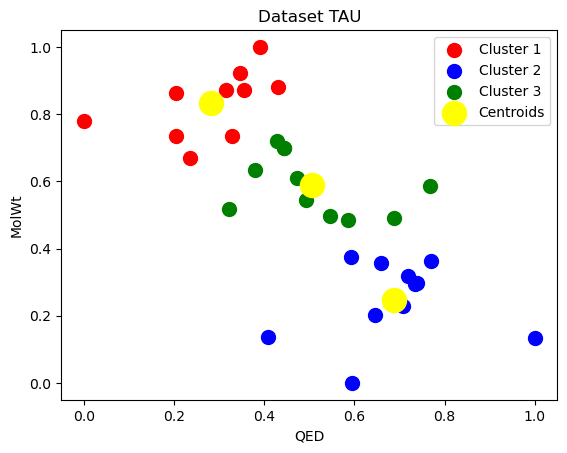

In [94]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset TAU')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

# K-means utilizando todas las variables

## ACHE

In [95]:
X = ACHE.iloc[:,:-1].values
X

array([[0.15799037, 0.98286595, 0.57894737, 0.42899914, 0.41666667,
        0.42857143],
       [0.60739842, 0.68635413, 0.47368421, 0.16787853, 0.41666667,
        0.14285714],
       [0.87331021, 0.56669958, 0.26315789, 0.17290419, 0.25      ,
        0.14285714],
       ...,
       [0.71564579, 0.53579784, 0.15789474, 0.3381095 , 0.25      ,
        0.14285714],
       [0.70522268, 0.55054383, 0.15789474, 0.3381095 , 0.25      ,
        0.14285714],
       [0.65703471, 0.61982298, 0.21052632, 0.38745723, 0.33333333,
        0.14285714]])

In [96]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=BACE.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

## BACE

In [97]:
X = BACE.iloc[:,:-1].values
X

array([[0.29350555, 0.15546683, 0.13793103, 0.15923991, 0.18181818,
        0.13043478],
       [0.2806432 , 0.15771667, 0.13793103, 0.15421814, 0.18181818,
        0.13043478],
       [0.31030245, 0.14280009, 0.12068966, 0.15421814, 0.13636364,
        0.13043478],
       ...,
       [0.64370808, 0.11766145, 0.05172414, 0.15305569, 0.18181818,
        0.13043478],
       [0.74941725, 0.07812537, 0.0862069 , 0.12303353, 0.22727273,
        0.08695652],
       [0.75629552, 0.10722892, 0.05172414, 0.15693052, 0.22727273,
        0.08695652]])

In [98]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=BACE.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

## TAU

In [99]:
X = TAU.iloc[:,:-1].values
X

array([[0.64561205, 0.20175591, 0.1       , 0.58117942, 0.28571429,
        1.        ],
       [0.7377192 , 0.29790518, 0.4       , 0.76562108, 0.57142857,
        1.        ],
       [0.59530406, 0.        , 0.        , 0.6131744 , 0.14285714,
        1.        ],
       [0.70681408, 0.22913881, 0.3       , 0.77942284, 0.42857143,
        1.        ],
       [1.        , 0.13300786, 0.1       , 0.48908407, 0.28571429,
        0.5       ],
       [0.58458585, 0.48610475, 0.6       , 0.493601  , 0.42857143,
        0.5       ],
       [0.40741579, 0.13731291, 0.1       , 0.82797992, 0.28571429,
        0.5       ],
       [0.76878632, 0.36214666, 0.4       , 0.6553325 , 0.57142857,
        0.5       ],
       [0.76768839, 0.58581714, 0.1       , 0.3314931 , 0.28571429,
        0.        ],
       [0.        , 0.77953084, 1.        , 0.78155583, 1.        ,
        0.        ],
       [0.73363866, 0.29338029, 0.4       , 0.60388959, 0.42857143,
        1.        ],
       [0.65847698, 0

In [100]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=TAU.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

# Juntando os datasets

In [101]:
ALL = pd.concat([ACHE, BACE, TAU])
ALL

,QED,MolWt,NumRotatableBonds,TPSA,NumHAcceptors,NumHDonors,Color
0,0.157990,0.982866,0.578947,0.428999,0.416667,0.428571,1
1,0.607398,0.686354,0.473684,0.167879,0.416667,0.142857,1
2,0.873310,0.566700,0.263158,0.172904,0.250000,0.142857,1
3,0.243697,0.579791,0.578947,0.299615,0.250000,0.142857,1
4,0.731753,0.175535,0.000000,0.297476,0.166667,0.285714,1
...,...,...,...,...,...,...,...
27,0.443130,0.698692,0.200000,0.838269,0.857143,0.500000,2
28,0.428817,0.718930,0.100000,0.722459,0.714286,0.500000,2
29,0.346183,0.922509,0.100000,0.722459,0.714286,0.500000,2
30,0.321782,0.518750,0.600000,0.000000,0.000000,0.000000,2


# Fazendo alguns gráficos com os dados das três proteínas

Os gráficos abaixo são exemplos para gente avaliar quais features são capazes de separar o conjunto de dados

In [102]:
fig = px.scatter_matrix(ALL.drop(ALL.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

In [103]:
fig1 = px.scatter(ALL, x="MolWt", y="QED", color="Color")
fig1.update_layout(title="3 Features Representation")
fig1.show()

In [104]:
fig2 = px.scatter_3d(ALL, x="MolWt", y="QED",z="TPSA",
                     color="Color",size="NumRotatableBonds")
fig2.update_layout(title="5 Features Representation")
fig2.show()

## Trabajando con los 3 conjuntos de datos

In [105]:
X = ALL.iloc[:, [0, 1]].values
X

array([[0.15799037, 0.98286595],
       [0.60739842, 0.68635413],
       [0.87331021, 0.56669958],
       ...,
       [0.34618316, 0.92250902],
       [0.3217817 , 0.51874989],
       [0.44312998, 0.698692  ]])

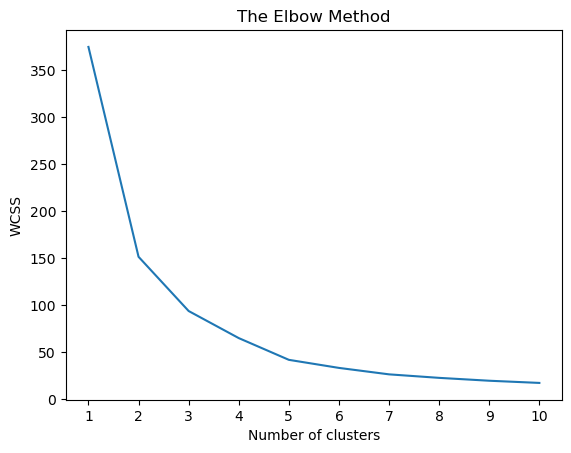

In [106]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Entrenando al modelo

In [107]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [109]:
y_kmeans

array([1, 3, 3, ..., 1, 1, 1], dtype=int32)

# Los grupos

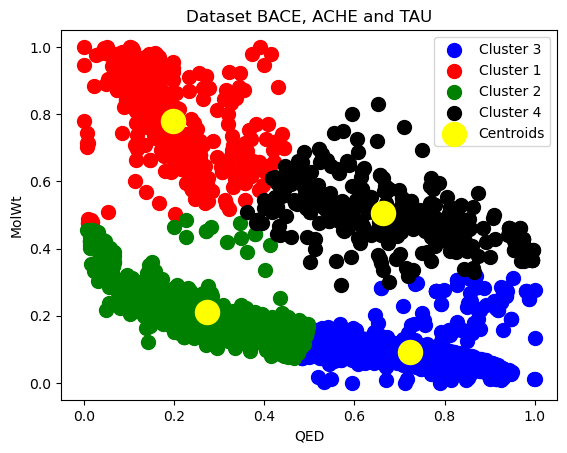

In [108]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset BACE, ACHE and TAU')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()